In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math as math
import numpy as np

In [2]:
#Getting all columns and rows from the file
df = pd.read_csv('redfin_2019-01-18-22-06-22.csv')

#### Selecting Parameters that affect the Prices

In [3]:
df = df[['CITY','PRICE','BEDS','BATHS','SQUARE FEET','ZIP','LOCATION','ADDRESS','PROPERTY TYPE']]

#### Removing rows where nan value exists in all columns

In [4]:
df = df.dropna(how='all')

#### Assigning unique numbers to unique location so that it can work as a parameter

In [5]:
df['LOCATION'],y = pd.factorize(df['LOCATION'])
df['LOCATION'] += 1

df = df.loc[df['CITY'] == 'Bothell']

df['CITY'],y = pd.factorize(df['CITY'])
df['CITY'] += 1

df['ZIP'],y = pd.factorize(df['ZIP'])
df['ZIP'] += 1

df['ADDRESS'],y = pd.factorize(df['ADDRESS'])
df['ADDRESS'] += 1

df['PROPERTY TYPE'],y = pd.factorize(df['PROPERTY TYPE'])
df['PROPERTY TYPE'] += 1

df = df.fillna(df.mean())
print (df)

     CITY    PRICE  BEDS     BATHS  SQUARE FEET  ZIP  LOCATION  ADDRESS  \
0       1   394950     3  1.500000   1232.00000    1         1        1   
1       1   290000     2  1.000000    887.00000    2         2        2   
2       1   320000     2  2.000000   1018.00000    2         2        3   
3       1   555000     4  2.500000   1854.00000    2         2        4   
4       1   625000     4  2.750000   2111.00000    1         1        5   
5       1   740000     4  2.500000   2925.00000    2         1        6   
6       1   600000     3  2.250000   1650.00000    3         3        7   
7       1   375000     3  1.750000   1396.00000    2         1        8   
8       1   565000     4  2.000000   2495.00000    1         4        9   
9       1   440000     2  2.000000   1096.00000    3         1       10   
10      1   455000     2  2.000000   1309.00000    3         5       11   
11      1   520000     4  2.500000   2158.00000    2         1       12   
12      1   830000     5 

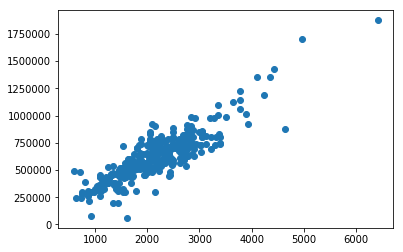

In [6]:
plt.scatter(df['SQUARE FEET'],df['PRICE'])

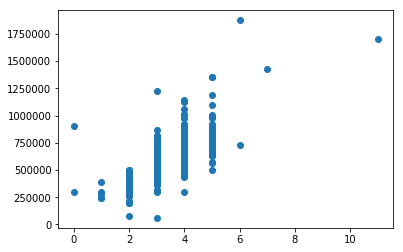

In [7]:
plt.scatter(df['BEDS'],df['PRICE'])

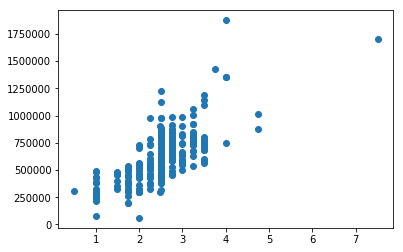

In [8]:
plt.scatter(df['BATHS'],df['PRICE'])

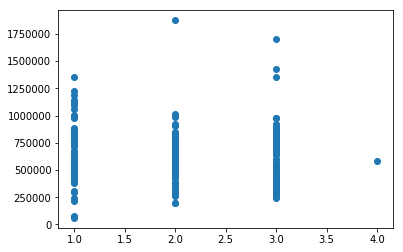

In [9]:
plt.scatter(df['ZIP'],df['PRICE'])

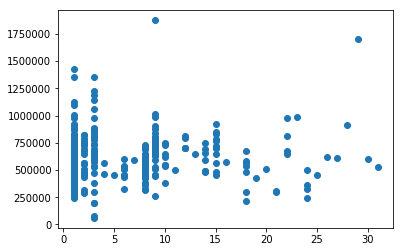

In [10]:
plt.scatter(df['LOCATION'],df['PRICE'])

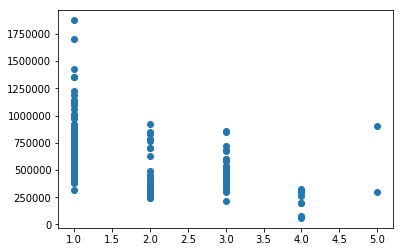

In [11]:
plt.scatter(df['PROPERTY TYPE'],df['PRICE'])

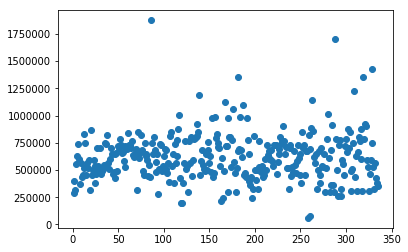

In [12]:
plt.scatter(df['ADDRESS'],df['PRICE'])

In [13]:

#allStats = data.describe()
mean = df.mean()
median = df.median()
standard_deviation = df.std()

print ("Mean of Data\n",mean)
print ("\nMedian of Data\n",median)
print ("\nStandard Deviation of Data\n",standard_deviation)

Mean of Data
 CITY                  1.000000
PRICE            620236.038806
BEDS                  3.540299
BATHS                 2.493243
SQUARE FEET        2146.120120
ZIP                   2.008955
LOCATION              6.167164
ADDRESS             168.000000
PROPERTY TYPE         1.417910
dtype: float64

Median of Data
 CITY                  1.0
PRICE            610000.0
BEDS                  4.0
BATHS                 2.5
SQUARE FEET        2110.0
ZIP                   2.0
LOCATION              3.0
ADDRESS             168.0
PROPERTY TYPE         1.0
dtype: float64

Standard Deviation of Data
 CITY                  0.000000
PRICE            219122.990770
BEDS                  1.062713
BATHS                 0.661262
SQUARE FEET         758.534873
ZIP                   0.654265
LOCATION              6.480888
ADDRESS              96.850400
PROPERTY TYPE         0.836110
dtype: float64


In [14]:
#60% of unique rows i.e 1 to 60% of total rows
training_data = df[:math.floor (len(df) * 0.6)]

#20% of unique rows i.e after the above 60% till the 80% 
validating_data = df[math.floor (len(df) * 0.6) : math.floor (len(df) * 0.8)]

#20% of unique rows i.e after the above 80% till the 100%
testing_data = df[math.floor (len(df) * 0.8) :]

training_data_Y = training_data['PRICE'].values
training_data_X = training_data[['CITY','BEDS','BATHS','SQUARE FEET']].values

validating_data_Y = validating_data['PRICE'].values
validating_data_X = validating_data[['CITY','BEDS','BATHS','SQUARE FEET']].values

testing_data_Y = testing_data['PRICE'].values
testing_data_X = testing_data[['CITY','BEDS','BATHS','SQUARE FEET']].values





#### Training data and creating theta function by it

In [15]:
xT = np.transpose(training_data_X)
xTx = np.matmul ( xT, training_data_X )
inverse_xTx = np.linalg.inv ( xTx )
xTy = np.matmul ( xT, training_data_Y )
theta_function =  np.matmul (inverse_xTx, xTy)

print (theta_function)

[110096.62726975 -11109.21987852  18420.85570897    235.28533479]


In [16]:
#Now Validation of Data
error_function = ( np.matmul( validating_data_X, theta_function ) - validating_data_Y ) ** 2

In [17]:
mean_square_error = np.sum(error_function)
root_mean_square_error = np.sqrt(mean_square_error) / np.size(error_function)
print ("Root Mean Square Error :",root_mean_square_error)

Root Mean Square Error : 12362.740626284167


In [18]:
predicted_Y = np.matmul ( testing_data_X ,theta_function )

###### Graphs showing predicted result along with the actual results  in the Y-axis and parameters used for calculation are in the X-axis

Text(0, 0.5, 'Price')

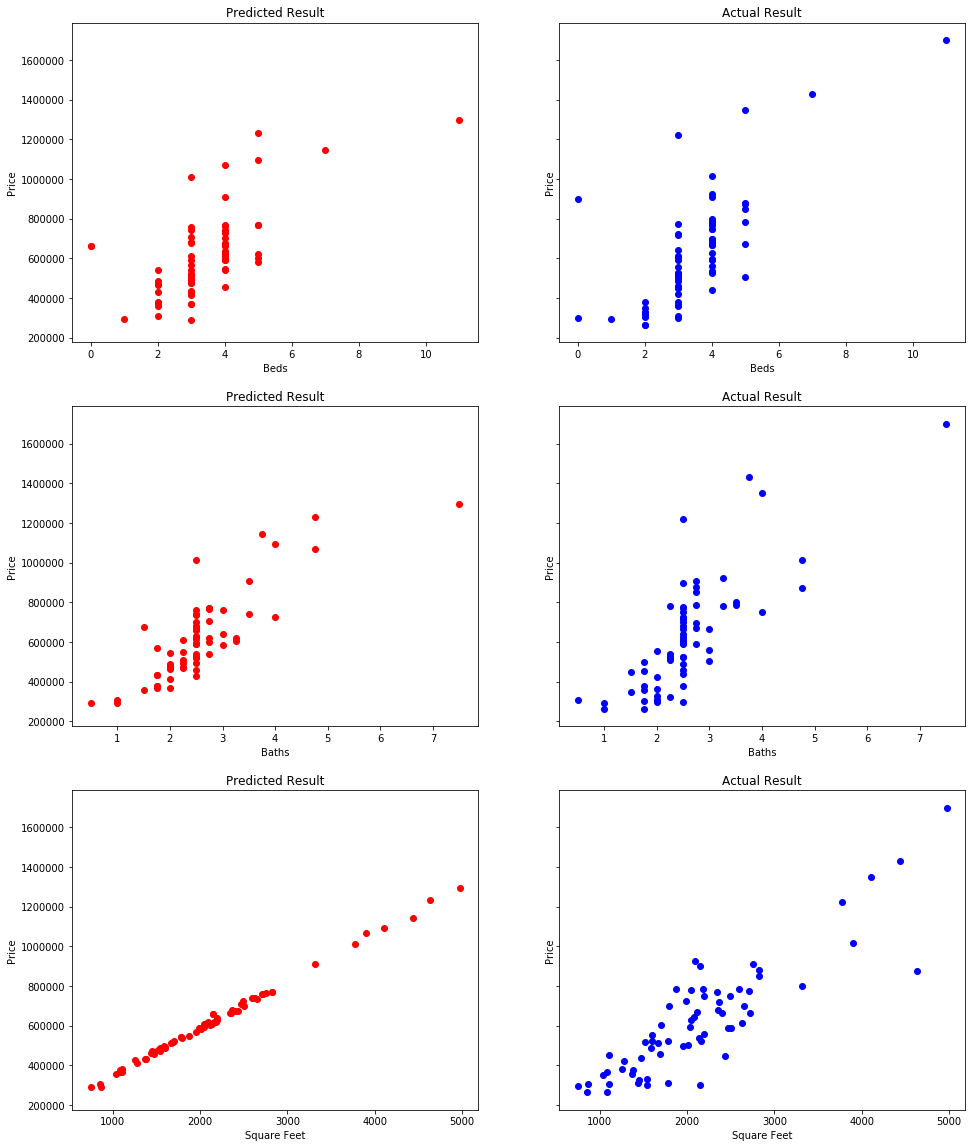

In [19]:
fig, arr = plt.subplots(nrows=3, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(20)

#Beds
arr[0][0].scatter (testing_data_X[:,1], predicted_Y, c='r' )
arr[0][0].set_title('Predicted Result')
arr[0][0].set_xlabel('Beds')
arr[0][0].set_ylabel('Price')

arr[0][1].scatter (testing_data_X[:,1], testing_data_Y, c='b' )
arr[0][1].set_title('Actual Result')
arr[0][1].set_xlabel('Beds')
arr[0][1].set_ylabel('Price')

#Baths
arr[1][0].scatter (testing_data_X[:,2], predicted_Y, c='r' )
arr[1][0].set_title('Predicted Result')
arr[1][0].set_xlabel('Baths')
arr[1][0].set_ylabel('Price')

arr[1][1].scatter (testing_data_X[:,2], testing_data_Y, c='b' )
arr[1][1].set_title('Actual Result')
arr[1][1].set_xlabel('Baths')
arr[1][1].set_ylabel('Price')

#SquareFeet
arr[2][0].scatter (testing_data_X[:,3], predicted_Y, c='r' )
arr[2][0].set_title('Predicted Result')
arr[2][0].set_xlabel('Square Feet')
arr[2][0].set_ylabel('Price')

arr[2][1].scatter (testing_data_X[:,3], testing_data_Y, c='b' )
arr[2][1].set_title('Actual Result')
arr[2][1].set_xlabel('Square Feet')
arr[2][1].set_ylabel('Price')


In [20]:
#Blue Predicted Result
#plt.scatter (testing_data_X[:,4], predicted_Y )
#Orange Actual Result
#plt.scatter (testing_data_X[:,4], testing_data_Y )

In [21]:
#Blue Predicted Result
#plt.scatter (testing_data_X[:,5], predicted_Y )
#Orange Actual Result
#plt.scatter (testing_data_X[:,5], testing_data_Y )

Text(0.5, 1.0, 'Actual Result')

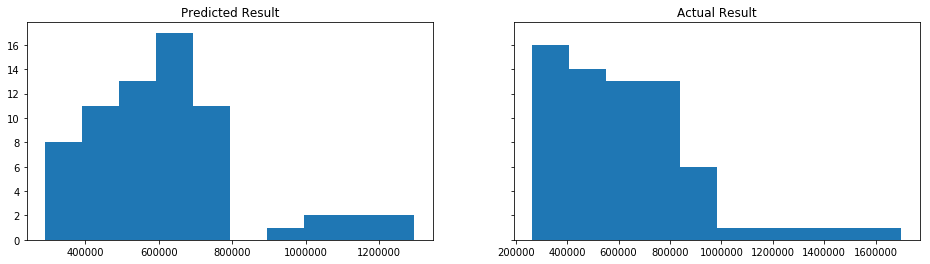

In [22]:
fig, arr = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True)

fig.set_figwidth(16)
fig.set_figheight(4)

arr[0].hist(predicted_Y)
arr[0].set_title('Predicted Result')

arr[1].hist(testing_data_Y)
arr[1].set_title('Actual Result')

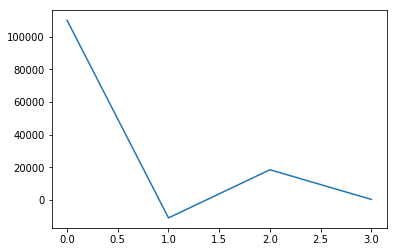

In [23]:
plt.plot(theta_function)